In [1]:
import pandas as pd
import numpy as np
import timeit
import operator
from sklearn.metrics import mean_squared_error as mse
from scipy.spatial import distance
from math import sqrt
from __future__ import division # for having results of accuracy in floating numbers

In [2]:
def transformData(df):
    temp=[]
    for row in df.iterrows():
        index, data = row
        temp.append(data.tolist())
    return temp

columns = ['user','movie','rating','idk']
train_90 = pd.read_csv("ratings_training_90.csv",names = columns)
test_10 = pd.read_csv("ratings_test_10.csv",names = columns)
test = transformData(test_10)

In [3]:
df_train= train_90.pivot(index='user', columns='movie', values='rating')
df_test= test_10.pivot(index='user', columns='movie', values='rating')
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)
time = []
rmsT = []

In [4]:
def getNeighbors(trainingSet, testInstance, k):
    testuser = int(testInstance[0])  
    testmovie = testInstance[1] 
    test_user_rating = testInstance[2]
    reduced_Data = trainingSet[trainingSet[testmovie] > 0]   # Subset of data for test movie id
    Other_users_rated_as = np.array(pd.DataFrame(reduced_Data)[int(testmovie)])
    filtered_users = reduced_Data.index.values   # users who have watched the movie being rated 
    pred_user = trainingSet[trainingSet.index == testuser]
    distances = []     # calculating distance
    d = 0 
    for i in filtered_users:
        dist = distance.euclidean(reduced_Data[reduced_Data.index == i],pred_user)
        distances.append([testuser,i,int(reduced_Data[reduced_Data.index==i][testmovie].values),dist])
    distances.sort(key=operator.itemgetter(3))
    check = len(distances)
    neighbors = []
    if (check > k):
        for i in range(k):
            neighbors.append(distances[i])
    else:
        for i in range(check):
            neighbors.append(distances[i])
    return neighbors

In [5]:
def get(neighbors):
    cl = 0
    for x in range(len(neighbors)):
        cl += neighbors[x][2]
    prediction = round(cl/float(len(neighbors)), 1)
    return prediction

In [6]:
a = int(len(test))
start = timeit.default_timer()
pred = []
predictions=[]
k = 10
#a = 20
for x in range(a):
    neigh = getNeighbors(df_train, test[x], k)
    result = get(neigh)
    predictions.append([test[x][0],test[x][1],test[x][2],result])
    pred.append(result)
stop = timeit.default_timer()
stop = stop - start

In [7]:
pred = pd.DataFrame(predictions)
pred.to_csv('ratings_predictions_10_knn_uw_k10.csv')

In [8]:
time.append(stop)
rms = sqrt(mse(pred[2],pred[3]))
rmsT.append(rms)

In [9]:
# Unweighted KNN
# time.  K = 3:   700.3680259380053  RMSE: 1.127934707729547
# time.  K = 5:   668.4838295660011  RMSE: 1.0604713965491257
# time.  K = 10:  653.8688204270002  RMSE: 1.02051020791709

In [10]:
time, rmsT

([432.47429992600155], [1.0204923263369583])

In [78]:
time = [660.6614640900079, 662.0650260520051, 660.425073802995,700.3680259380053, 668.4838295660011, 653.8688204270002]
algorithm = ['Wt-KNN', 'Wt-KNN', 'Wt-KNN', 'UNWT-KNN', 'UNWT-KNN', 'UNWT-KNN']
rmse = [1.2707091613268062, 1.1444297704440511, 1.054834443814851,1.127934707729547, 1.0604713965491257, 1.02051020791709]
k = [3,5,10,3,5,10]
Knn_metric = pd.DataFrame(k,columns=['K-Value'])
Knn_metric['time'] = time
Knn_metric['rmse'] = rmse
Knn_metric['algorithm'] = algorithm

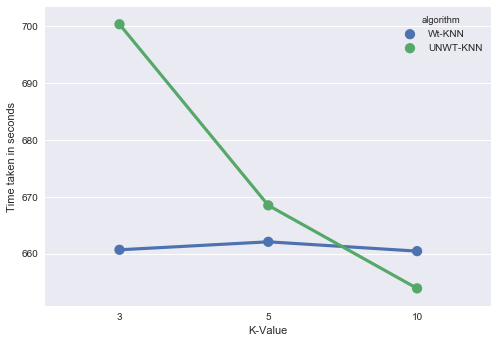

In [95]:
import seaborn as sns
g = sns.pointplot(x="K-Value", y="time",hue = 'algorithm', data=Knn_metric)
g.set(xlabel='K-Value', ylabel='Time taken in seconds')
plt.show()

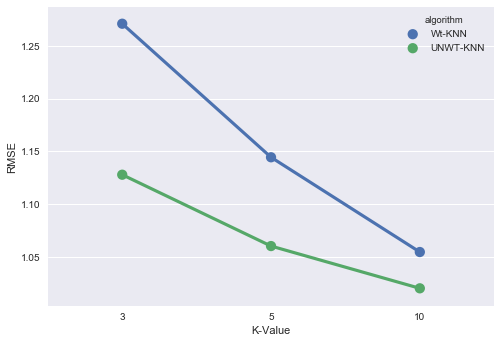

In [99]:
g = sns.pointplot(x="K-Value", y="rmse",hue = 'algorithm', data=Knn_metric)
g.set(xlabel='K-Value', ylabel='RMSE')
plt.show()

In [100]:
Knn_metric

,K-Value,time,rmse,algorithm
0,3,660.661464,1.270709,Wt-KNN
1,5,662.065026,1.144430,Wt-KNN
2,10,660.425074,1.054834,Wt-KNN
3,3,700.368026,1.127935,UNWT-KNN
4,5,668.483830,1.060471,UNWT-KNN
5,10,653.868820,1.020510,UNWT-KNN
